In [149]:
# Jun Tu 
# Guanda Zhao 21-716-345

In [150]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.stats as sts

In [151]:
data_base_path = "Data/"
data_rnd_base_path = "Data Random/"

G_terrorists = nx.read_gml(data_base_path + "graph_terrorists.gml")
G_terrorists_rnd = nx.read_gml(data_rnd_base_path + "graph_terrorists_random.gml")
G_polblog = nx.read_gml(data_base_path + "graph_polblog.gml")
G_polblog_rnd = nx.read_gml(data_rnd_base_path + "graph_polblog_random.gml")
G_jazz = nx.read_gml(data_base_path + "graph_jazz_collab.gml")
G_jazz_rnd = nx.read_gml(data_rnd_base_path + "graph_jazz_collab_random.gml")
G_florida = nx.read_gml(data_base_path + "Florida_foodweb.graphml")

## thread unsafe
figure_uni_index=0
def new_figure():
    global figure_uni_index
    figure_uni_index = figure_uni_index + 1
    fig = plt.figure(figure_uni_index)
    return fig

NetworkXError: cannot tokenize <?xml version='1.0' encoding='utf-8'?> at (1, 1)

In [ ]:
def centrality(G):
    d_c = nx.degree_centrality(G)
    c_c = nx.closeness_centrality(G)
    b_c = nx.betweenness_centrality(G)
    e_c = nx.eigenvector_centrality(G)
    
    node = G.nodes()
    
    degree_c = [d_c[n] for n in node]
    closeness_c = [c_c[n] for n in node]
    betweenness_c = [b_c[n] for n in node]
    eigenvector_c = [e_c[n] for n in node]
    
    return degree_c, closeness_c, betweenness_c, eigenvector_c

In [ ]:
def scatter_centrality(G):
    degree_c,closeness_c,betweenness_c,eigenvector_c = centrality(G)
    c_array = np.array([degree_c, closeness_c, betweenness_c, eigenvector_c])
    label = ["degree centrality", "closeness centrality", "betweenness centrality", "eigenvector centrality"]
#   plot with conbination of C(6, 2)
    x=0
    y=x+1
    while(x<len(c_array)):
        while(y<len(c_array)):
            new_figure()
            plt.xlabel(label[x])
            plt.ylabel(label[y])
            plt.scatter(c_array[x],c_array[y])
            y=y+1
        x=x+1
        y=x+1

In [152]:
def graph_correlation(G):
    degree_c,closeness_c,betweenness_c,eigenvector_c = centrality(G)
    c_array = np.array([degree_c, closeness_c, betweenness_c, eigenvector_c])

    label = ["degree centrality", "closeness centrality", "betweenness centrality", "eigenvector centrality"]
    x=0
    y=x+1
    while(x<len(c_array)):
        while(y<len(c_array)):
            fig = new_figure()
            ax = fig.add_subplot()
            ax.set_xlabel(label[x])
            ax.set_ylabel(label[y])
            ax.scatter(c_array[x],c_array[y])
            spearman = sts.spearmanr(c_array[x], c_array[y])
            pearson = sts.pearsonr(c_array[x], c_array[y])
            kendall = sts.kendalltau(c_array[x], c_array[y])
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            textstr = '\n'.join((
                r'$\mathrm{Spearman}=%.5f$' % (spearman[0]),
                r'$\mathrm{Pearson}=%.5f$' % (pearson[0]),
                r'$\mathrm{Kendall}=%.5f$' % (kendall[0])))
            ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
            y=y+1
        x=x+1
        y=x+1

In [ ]:
graph_correlation(G_terrorists)

In [ ]:
graph_correlation(G_polblog)

In [ ]:
graph_correlation)

In [153]:
def compare_original_random_centrality(G, G_rnd, g_label="origin", r_rnd_label="random"):
    degree_c,closeness_c,betweenness_c,eigenvector_c = centrality(G)
    rnd_degree_c,rnd_closeness_c,rnd_betweenness_c,rnd_eigenvector_c = centrality(G_rnd)
    c_array = np.array([degree_c, closeness_c, betweenness_c, eigenvector_c])
    rnd_c_array  = np.array([rnd_degree_c,rnd_closeness_c,rnd_betweenness_c,rnd_eigenvector_c])
    
    title = ["degree centrality", "closeness centrality", "betweenness centrality", "eigenvector centrality"]
    for i in range(0, len(c_array)):
        new_figure()
        plt.title(title[i])
        plt.xlabel(g_label)
        plt.ylabel(r_rnd_label)
        plt.scatter(c_array[i], rnd_c_array[i])

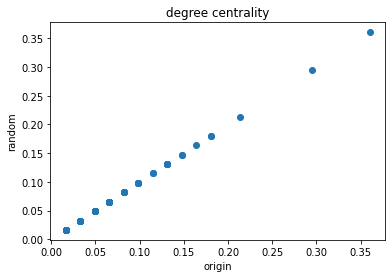

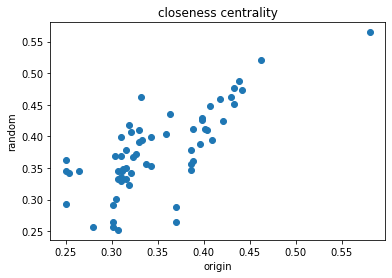

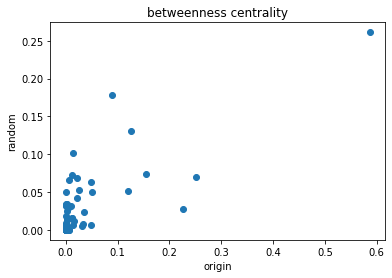

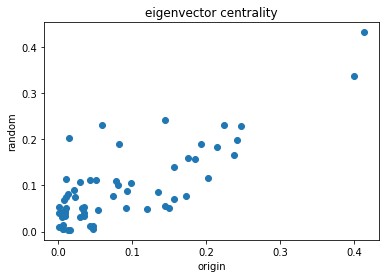

In [148]:
compare_original_random_centrality(G_terrorists, G_terrorists_rnd)

In [ ]:
compare_original_random_centrality(G_polblog, G_polblog_rnd)

In [ ]:
compare_original_random_centrality(G_jazz, G_jazz_rnd)

In [139]:
def page_rank(G):
    pr = []
    pr85 = []
    pr_dict = []
    spearman = []
    value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99]
    pr85_dict = nx.pagerank(G, alpha = 0.85)
    for i in range(0, len(value)):
        pr_dict.append(nx.pagerank(G, alpha = value[i]))
    
    pr85 = [pr85_dict[i] for i in pr85_dict]
    for i in range(0, len(value)):
        pr = [pr_dict[i][j] for j in pr_dict[i]]
        spearman.append(sts.spearmanr(pr, pr85)[0])
        
    plt.xlabel('alpha')
    plt.ylabel('Spearman Correlation Coefficient')
    plt.scatter(value, spearman)  

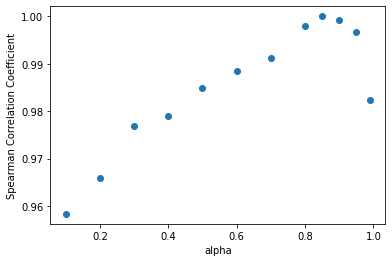